In [1]:
from google.colab import files
uploaded = files.upload()

Saving abalone.csv to abalone.csv


# Read csv dataset

In [4]:
import io
import pandas as pd

abaloneDf = pd.read_csv(io.BytesIO(uploaded['abalone.csv']))

# viewing data

In [5]:
abaloneDf

,Sex,Length,Diameter,Height,ww,sw,vw,sw.1,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
abaloneDf.describe()

,Length,Diameter,Height,ww,sw,vw,sw.1,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# Visualize data

<Figure size 432x288 with 0 Axes>

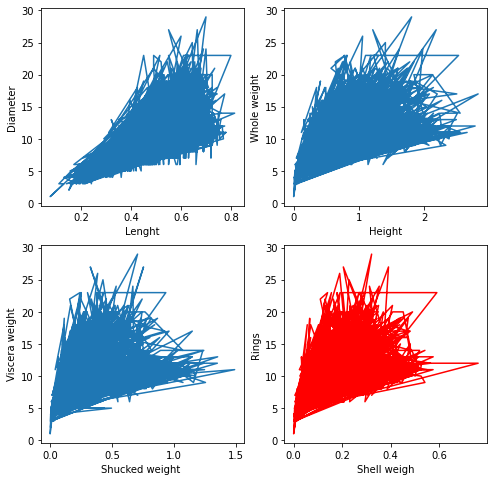

In [12]:
import matplotlib.pyplot as plt
import numpy as np

fir = plt.figure()
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2,2, figsize=(8, 8))

ax1.plot(abaloneDf["Length"], abaloneDf["Rings"])
ax1.set_xlabel('Lenght')
ax1.set_ylabel('Diameter')

ax2.plot(abaloneDf["ww"], abaloneDf["Rings"],label="dog")
ax2.set_xlabel('Height')
ax2.set_ylabel('Rings')

ax3.plot(abaloneDf["sw"], abaloneDf["Rings"])
ax3.set_xlabel('Shucked weight ')
ax3.set_ylabel('Rings')

ax4.plot(abaloneDf["vw"],  abaloneDf["Rings"], 'r') 
ax4.set_xlabel('Shell weigh')
ax4.set_ylabel('Rings')
 

plt.show()

# Trainig data

In [41]:
abaloneDf["M"] = np.nan
abaloneDf["F"] = np.nan
abaloneDf["I"] = np.nan
columnName='Sex'

for i in range (len(abaloneDf[columnName])):
    if abaloneDf[columnName][i]=='M':
      abaloneDf['M'][i]=1
      abaloneDf['F'][i]=0
      abaloneDf['I'][i]=0
    elif abaloneDf[columnName][i]=='F':
      abaloneDf['M'][i]=0
      abaloneDf['F'][i]=1
      abaloneDf['I'][i]=0
    elif abaloneDf[columnName][i]=='I' :
      abaloneDf['M'][i]=0
      abaloneDf['F'][i]=0
      abaloneDf['I'][i]=1

abaloneDf = abaloneDf.drop(['Sex'],axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: Setti

In [42]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


x = abaloneDf.drop(['Rings'],axis=1)
y = abaloneDf['Rings']
x = preprocessing.normalize(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [65]:
import tensorflow
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from tensorflow.keras import optimizers



model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(100,1)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='relu'))
model.summary()


#test=model.evaluate(x_test, y_test, verbose=1)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 100, 256)          512       
                                                                 
 dense_54 (Dense)            (None, 100, 256)          65792     
                                                                 
 dense_55 (Dense)            (None, 100, 256)          65792     
                                                                 
 dense_56 (Dense)            (None, 100, 256)          65792     
                                                                 
 dense_57 (Dense)            (None, 100, 1)            257       
                                                                 
Total params: 198,145
Trainable params: 198,145
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(loss='mean_absolute_error', 
              optimizer='adam', metrics=['mean_absolute_error'])

x_train.shape
y_train.shape



(3000,)

In [67]:
history = model.fit(x_train,y_train,batch_size=100,epochs=10,verbose=1)


Epoch 1/10


30/30 [==============================] - 1s 7ms/step - loss: 6.5435 - mean_absolute_error: 6.5435
Epoch 2/10
30/30 [==============================] - 0s 8ms/step - loss: 2.1994 - mean_absolute_error: 2.1994
Epoch 3/10
30/30 [==============================] - 0s 8ms/step - loss: 2.0040 - mean_absolute_error: 2.0040
Epoch 4/10
30/30 [==============================] - 0s 8ms/step - loss: 1.9812 - mean_absolute_error: 1.9812
Epoch 5/10
30/30 [==============================] - 0s 8ms/step - loss: 1.9933 - mean_absolute_error: 1.9933
Epoch 6/10
30/30 [==============================] - 0s 8ms/step - loss: 1.9838 - mean_absolute_error: 1.9838
Epoch 7/10
30/30 [==============================] - 0s 8ms/step - loss: 1.9738 - mean_absolute_error: 1.9738
Epoch 8/10
30/30 [==============================] - 0s 7ms/step - loss: 1.9717 - mean_absolute_error: 1.9717
Epoch 9/10
30/30 [==============================] - 0s 8ms/step - loss: 1.9670 - mean_absolute_error: 1.9670
Epoch 10/10
30/30 [===========

#Evaluate

In [68]:
test=model.evaluate(x_test, y_test, verbose=1)


37/37 [==============================] - 0s 2ms/step - loss: 1.8744 - mean_absolute_error: 1.8744
